We build an image segmentation dataset using the example files provided here : https://nora-imaging.org/#

We select a pair (MNI_T1_lowres.nii, atlas116.nii) of corresponding 3D image and labels

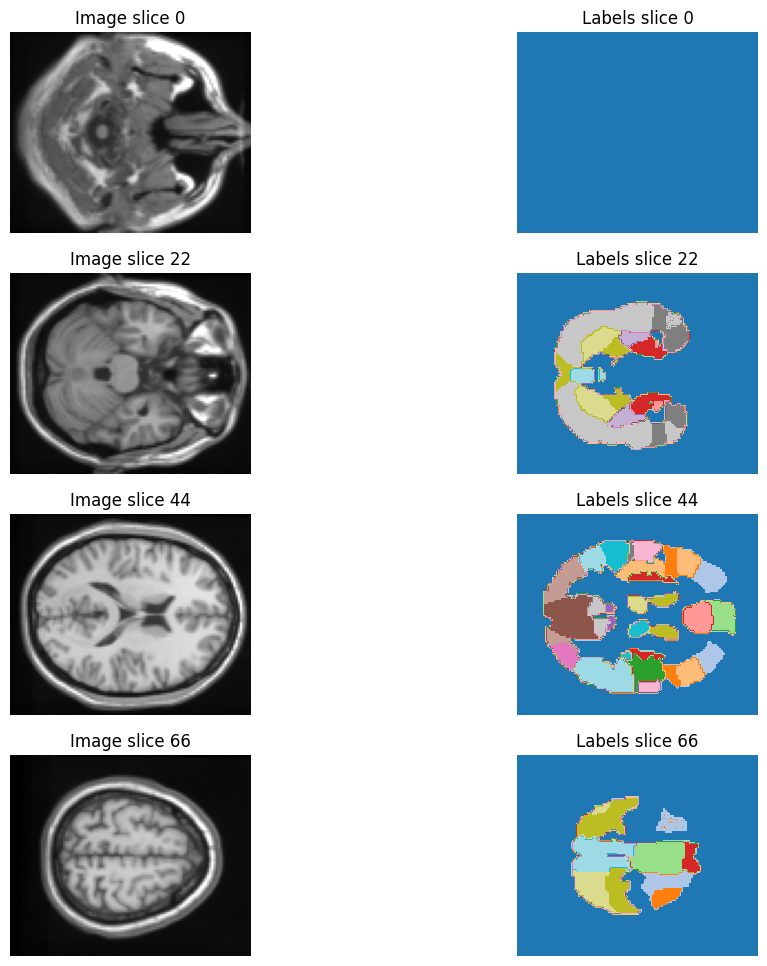

In [1]:
import matplotlib.pylab as plt
import numpy as np
import nibabel as nib
from src.utils import display_img_and_label

img_path = "../../data/MNI_T1_lowres.nii" #(91, 109, 91, 1). floats in (0,255) corresponding to shade
labels_path = "../../data/atlas116.nii" #(91, 109, 91). int in [0,116] corresponding to zones

img = nib.load(img_path).get_fdata()
labels = nib.load(labels_path).get_fdata()

# Display 4 matching slices of image and labels
display_img_and_label(img, labels)


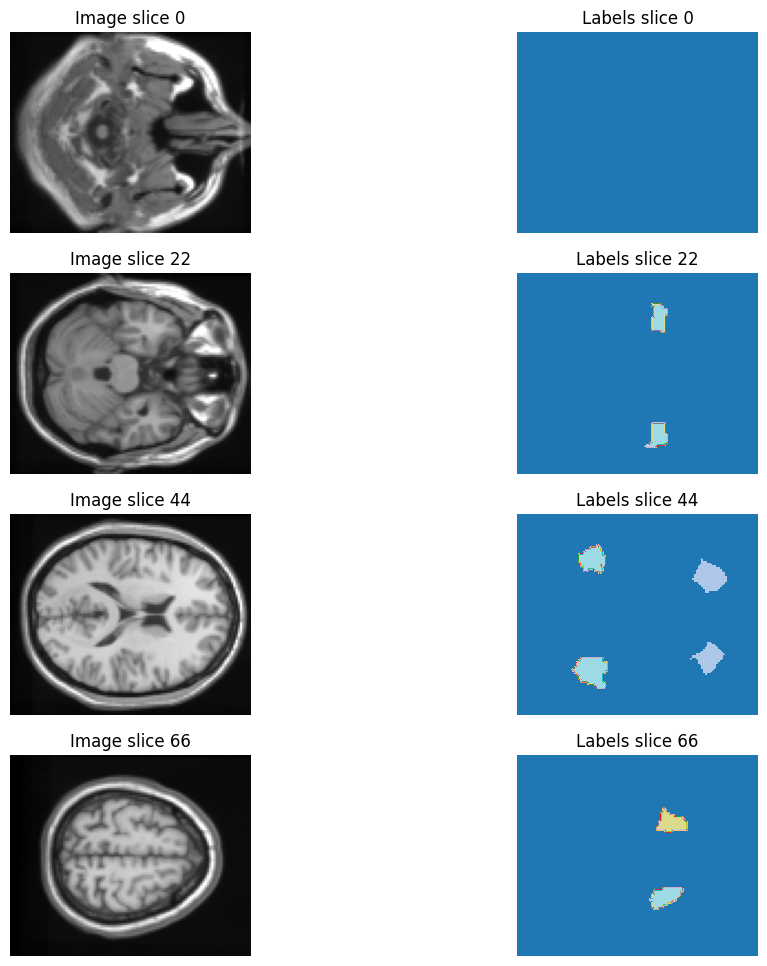

In [2]:
"""
There are 116 labels in the atlas116. 
We select the 5 labels with the most surface.
""" 
# keep only the 5 most common labels
# 
unique, counts = np.unique(labels, return_counts=True)
most_common_labels = unique[np.argsort(counts)[-5:]]
# set all other labels to 0 (background)
labels = np.where(np.isin(labels, most_common_labels), labels, 0)


# Display 4 matching slices of image and labels
display_img_and_label(img, labels)



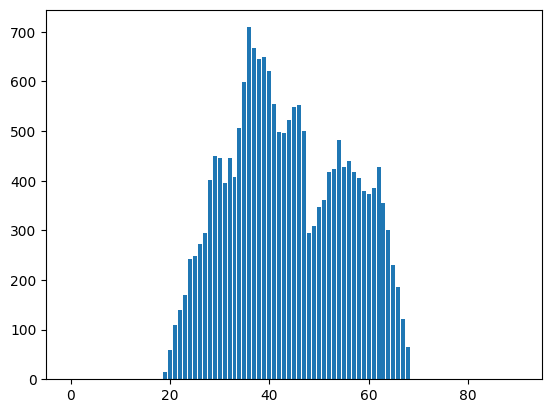

In [3]:
# bar plot of the non background labels
nb_slices=labels.shape[2]
non_zero_labels = [np.count_nonzero(labels[:,:,i]) for i in range(nb_slices)]
plt.bar(range(nb_slices), non_zero_labels)
plt.show()

# We keep slices from 30 to 60
# For each slice, we can use the adjacent slices as context 

In [7]:
# save slices 30 to 40 as images
for i in range(30, 41):
    slice_img = img[:,:,i]
    #dimemsion 3 of slice_img is 1, it should be 3
    slice_img = np.stack((slice_img,)*3, axis=-1)
    slice_img=slice_img/255 # squeeze the image to 3 channels
    # squeeze the image to 3 channels
    slice_img = slice_img.squeeze()
    slice_labels = labels[:,:,i]

    # set all labels to either background or foreground
    slice_labels = np.where(slice_labels==0, 0, 1)
    
    
    plt.imsave(f"../data/slice_{i}_img.jpg", slice_img, cmap="gray")
    plt.imsave(f"../data/slice_{i}_labels.png", slice_labels, cmap="gray")

In [ ]:
#open one of the saved images
img_ = plt.imread("../data/hmbb_1_target.png")
img_.shape


(168, 300, 3)

In [ ]:
slice_img.shape

(91, 109, 3)